In [1]:
%matplotlib inline

# variation on https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [2]:
# data loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [7]:
# updatable plot
# a minimal example (sort of)

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        if epoch % 1 == 0:
            clear_output(wait=True)
            plt.plot(self.x, self.losses, label="loss")
            plt.plot(self.x, self.val_losses, label="val_loss")
            plt.title('Train and validation losses')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train loss', 'Validation loss'], loc='upper right')
            plt.savefig('losses/losses_epoch_(%d).png' % epoch)
            plt.show();
        
plot_losses = PlotLosses()

In [5]:
# just logistic regression, to keep it simple and fast

model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

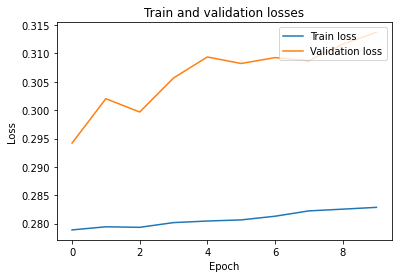

In [8]:
# in this static viewer it is not obvious,
# but this plot grows step by step

model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=0)